In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from figure.Geom_figures import Ellipse, Triangle, Rectangle, Flower
from PDE.Conductivity_R2.Conductivity import Conductivity
from cfg import mconfig
from dict.CGPT.Invariant_descriptors import Compute_Invariants, ShapeRecognition_CGPT_frequency, ShapeRecognition_CGPT_majority_voting_frequency, ShapeRecognition_PT_freq
from figure.ImageShape.Image_shape import ImgShape
from tqdm import tqdm

In [3]:
#Set up the number of points
N = 2**9
#Set up typical size
delta = 0.2

In [4]:
#Create different inclusions
B1 = Ellipse(1, 1/2, phi=0.0, NbPts=N)
B2 = Triangle(1, np.pi/3, npts= N)
B3 = Rectangle(1, 1/2, N)
B4 = Flower(1, 1, N, 5,0.3, tau=0.5)  
B5 = Ellipse(1, 1/4, phi=0.0, NbPts=N)
B6 = ImgShape('../../Test_images/A.png', N)
B7 = ImgShape('../../Test_images/F.png', N)
B8 = ImgShape('../../Test_images/B.png', N)
B9 = ImgShape('../../Test_images/C.png', N)
B10 = ImgShape('../../Test_images/D.png', N)
B11 = ImgShape('../../Test_images/G.png', N)
B12 = ImgShape('../../Test_images/H.png', N)
B13 = ImgShape('../../Test_images/I.png', N)
B14 = ImgShape('../../Test_images/Elephant.png', N)
B15 = ImgShape('../../Test_images/Butterfly.png', N)
B16 = ImgShape('../../Test_images/Shark.png', N)
B17 = ImgShape('../../Test_images/DinO_Fish.png', N)
B18 = ImgShape('../../Test_images/E.png', N)
B19 = Flower(1, 1, N, 3,0.3, tau=0.5) 
B20 = Flower(1, 1, N, 8,0.3, tau=0.5)
B21 = Flower(1, 1, N, 20,0.3, tau=0.9)
B22 = Flower(1, 1, N, 20,0.3, tau=0)

/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)


Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!


In [5]:
#Define a dictionary of shapes
D = [B1*delta, B2*delta, B3*delta, B4*delta, B5*delta, B6*delta, B7*delta, B8*delta, B9*delta, B10*delta, B11*delta,
      B12*delta, B13*delta, B14*delta, B15*delta, B16*delta, B17*delta, B18*delta, B19*delta, B20*delta, B21*delta, B22*delta]


In [6]:
#Set conductivity and permitivitty for inclusions
cnd = 10*np.ones(22)
cnd[21] = 20
pmtt = 5*np.ones(22)
pmtt[21] = 15

#Set up a list of working frequencies
freq = np.linspace(1, 300*np.pi, endpoint=False, num=20)

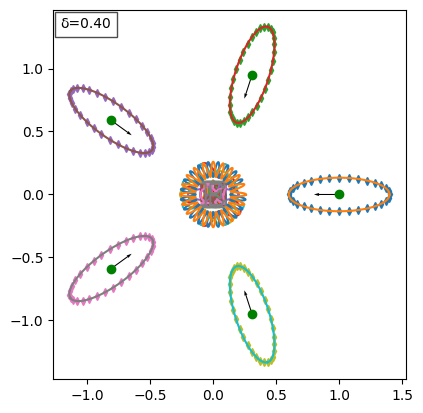

In [7]:
#Set up the fish body
Omega = Ellipse(1, 1/3, phi=0.0, NbPts=N) * delta*2

#Set up specific parameters for acquisition method
idxRcv = np.arange(0, Omega.nb_points-1,2**4)
Ns = 5
impd = 1
#Set up the fish acquisition system
cfg = mconfig.Fish_circle(Omega, idxRcv, np.zeros((2,1)), 1, Ns, 2*np.pi, impd=impd)
#Plot the configuration with the shapes
ax = plt.subplot()
cfg.plot(ax=ax)

for shape in D:
    shape.plot(ax=ax)

plt.show()


In [8]:
#Compute Invariants for the dictionary shapes

tau, mu = Compute_Invariants(D, cfg, cnd, pmtt, freq, 'fish', ord=1)

I1, I2 = Compute_Invariants(D, cfg, cnd, pmtt, freq, 'fish', ord=2) 

Computing shapes: 100%|██████████| 22/22 [07:08<00:00, 19.49s/it]


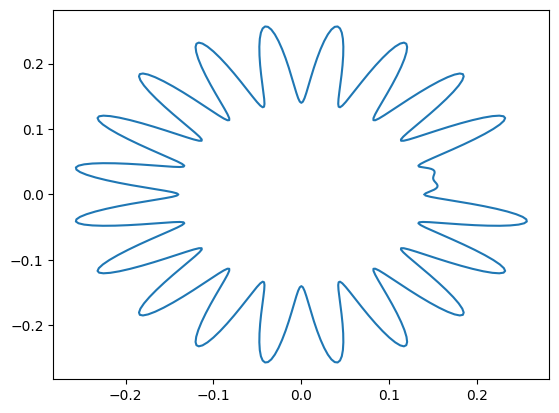

In [9]:
#Define a true index for the shape:
true_index = 20
#Generate a new shape to recognize
Bnew = (D[true_index])

#Set up parameters to perturb the shape
epsilon = 0
p = 2**5
n = 1
#Perturb the chosen shape
Bnew = Bnew.global_perturbation(epsilon, p, n)

#Plot the chose shape
axx = plt.subplot()
Bnew.plot(ax=axx)
plt.show()

In [10]:
#Define new conductivity and permitivitty values
cnd_new = np.array([cnd[true_index]])
pmtt_new = np.array([pmtt[true_index]])
nlvl = 0

#Compute the invariants of the new shape
tau_new, mu_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=1, noise_level=nlvl)

I1_new, I2_new =  Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=2, noise_level=nlvl)

Computing shapes: 100%|██████████| 1/1 [00:20<00:00, 20.95s/it]


Recognized shape index PT: 20
Recognized shape index high order: 20
Recognized shape majority voting 20
Votes per shape were: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 20.  0.]
True index: 20


<Figure size 1000x500 with 0 Axes>

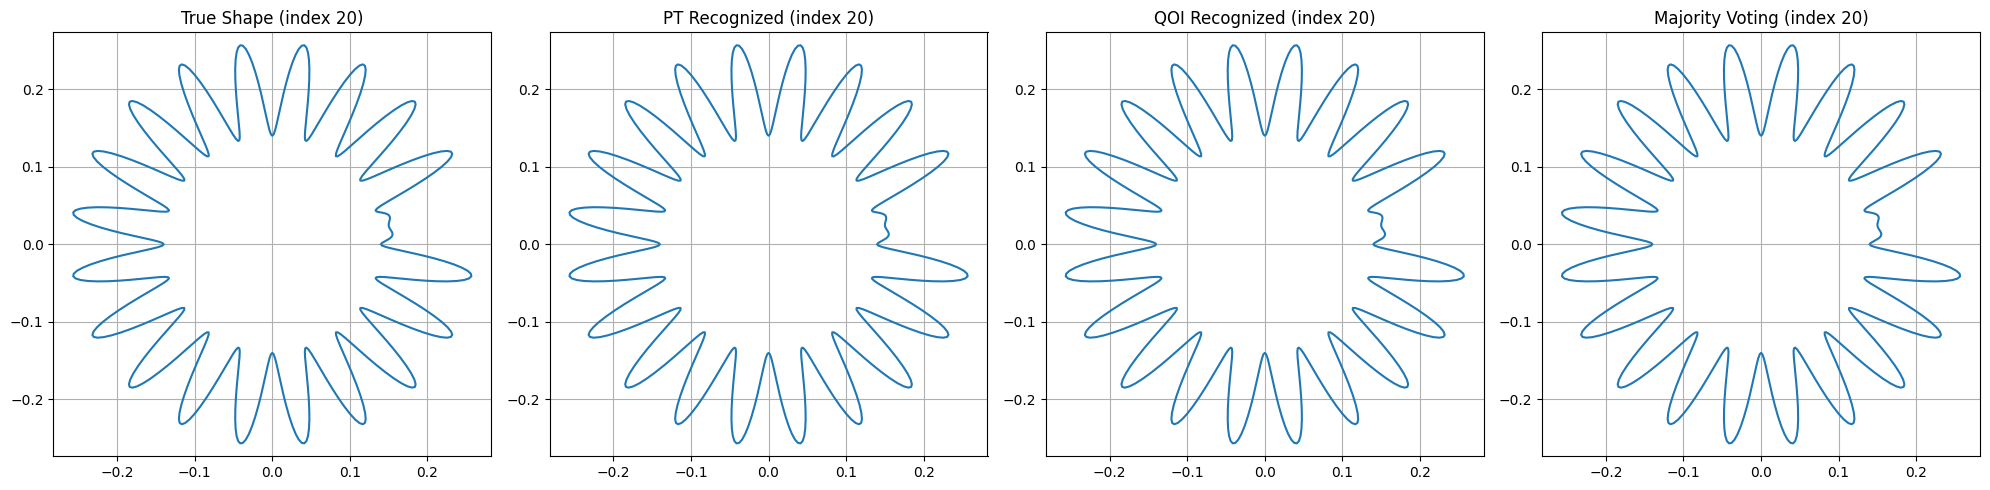

In [11]:
# Recognize the shape using different algorithms 
index_higher_order, error = ShapeRecognition_CGPT_frequency(I1, I2, I1_new, I2_new)
index_maj, votes = ShapeRecognition_CGPT_majority_voting_frequency(I1, I2, I1_new, I2_new)
index = ShapeRecognition_PT_freq(mu, mu_new)

print( "Recognized shape index PT:", index)
print( "Recognized shape index high order:", index_higher_order)
print("Recognized shape majority voting", index_maj)
print("Votes per shape were:", votes)
print("True index:", true_index)
#Plot the results
plt.figure(figsize=(10, 5))
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot true shape
D[true_index].plot(ax=axs[0])
axs[0].set_title("True Shape (index {})".format(true_index))

# Plot recognized shape by PT
D[int(index)].plot(ax=axs[1])
axs[1].set_title("PT Recognized (index {})".format(index))

# Plot recognized shape by higher order
D[int(index_higher_order)].plot(ax=axs[2])
axs[2].set_title("QOI Recognized (index {})".format(index_higher_order))

# Plot recognized shape by majority voting
D[int(index_maj)].plot(ax=axs[3])
axs[3].set_title("Majority Voting (index {})".format(index_maj))

for ax in axs:
    ax.axis('equal')
    ax.axis('on')
    ax.grid(True)  # Add grid

plt.tight_layout()
plt.show()


In [ ]:
# Parameters for the experiment
noise_levels = np.logspace(-3, 0, 15)
n_trials = 10  # Number of trials per noise level

success_rates_ord2 = {}
success_rates_ord1 = {}
success_rates_maj = {}

cnd_new = np.array([cnd[true_index]])
pmtt_new = np.array([pmtt[true_index]])

for noise in tqdm(noise_levels, desc="Noise levels"):
    n_success_ord2 = 0
    n_success_ord1 = 0
    n_success_maj = 0
    for _ in range(n_trials):
        # Perturb the shape
        Bnew = D[true_index].global_perturbation(epsilon, p, n)
        # Compute invariants with noise (order 2)
        I1_new, I2_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=2, noise_level=noise,verbose=False)
        recog_index_ord2, _ = ShapeRecognition_CGPT_frequency(I1, I2, I1_new, I2_new)
        if int(recog_index_ord2) == true_index:
            n_success_ord2 += 1
        # Majority voting
        recog_index_maj, _ = ShapeRecognition_CGPT_majority_voting_frequency(I1, I2, I1_new, I2_new)
        if int(recog_index_maj) == true_index:
            n_success_maj += 1
        # Compute invariants with noise (order 1)
        tau_new, mu_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=1, noise_level=noise, verbose = False)
        recog_index_ord1 = ShapeRecognition_PT_freq(mu, mu_new)
        if int(recog_index_ord1) == true_index:
            n_success_ord1 += 1
    success_rates_ord2[noise] = n_success_ord2 / n_trials
    success_rates_ord1[noise] = n_success_ord1 / n_trials
    success_rates_maj[noise] = n_success_maj / n_trials

print("Success rates by noise level (order 2):", success_rates_ord2)
print("Success rates by noise level (order 1):", success_rates_ord1)
print("Success rates by noise level (majority voting):", success_rates_maj)


Noise levels:   7%|▋         | 1/15 [06:49<1:35:38, 409.89s/it]

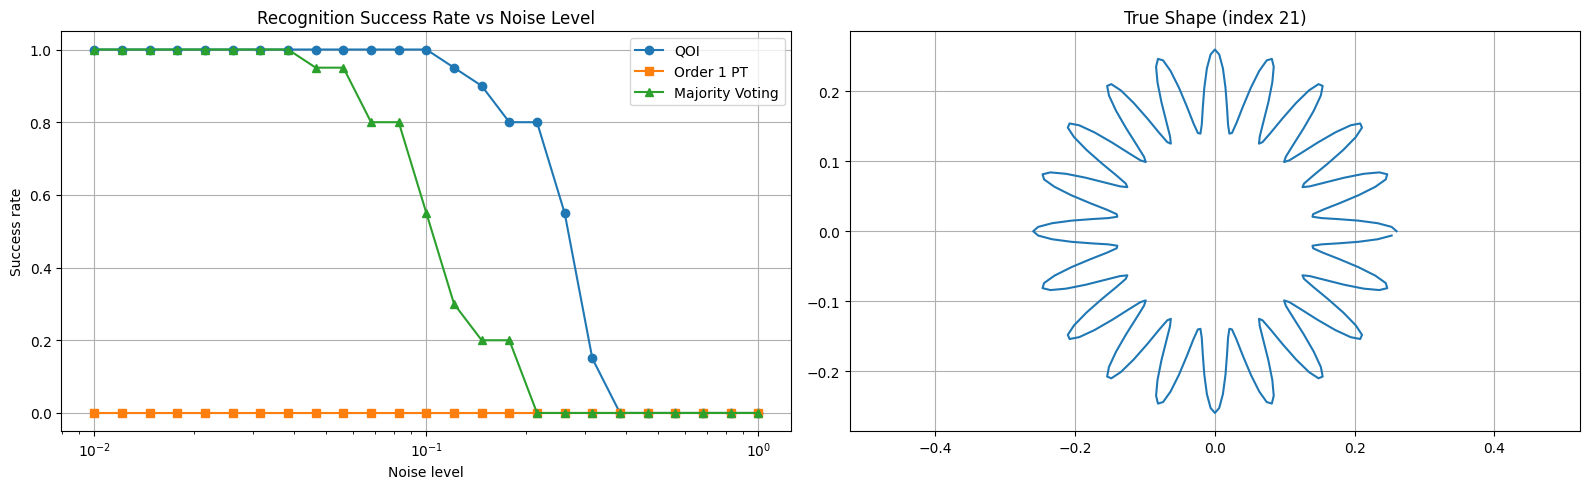

In [ ]:
# Plot the comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot the success rates
axs[0].plot(list(success_rates_ord2.keys()), list(success_rates_ord2.values()), marker='o', label='QOI')
axs[0].plot(list(success_rates_ord1.keys()), list(success_rates_ord1.values()), marker='s', label='Order 1 PT')
axs[0].plot(list(success_rates_maj.keys()), list(success_rates_maj.values()), marker='^', label='Majority Voting')
axs[0].set_xlabel('Noise level')
axs[0].set_ylabel('Success rate')
axs[0].set_title('Recognition Success Rate vs Noise Level')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xscale('log')

# Plot the true figure
D[true_index].plot(ax=axs[1])
axs[1].set_title(f"True Shape (index {true_index})")
axs[1].axis('equal')
axs[1].axis('on')
axs[1].grid(True)

plt.tight_layout()
plt.show()